# Imports

In [2]:

import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 


# Estatística Descritiva e Exploração Inicial


In [3]:
df = pd.read_csv("dataset.csv" , sep =",")

In [4]:

df.head()

,row_id,boardgame,release_year,min_players,max_players,min_playtime,max_playtime,minimum_age,avg_rating,num_ratings,...,rank_strategy,rank_thematic,rank_family,rank_war,rank_customizable,rank_abstract,rank_party,rank_childrens,url,description
0,1,Brass: Birmingham,2018,2,4,60,120,14,8.575,53548,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/224517/bra...,"Build networks, grow industries, and navigate ..."
1,2,Pandemic Legacy: Season 1,2015,2,4,60,60,13,8.512,56071,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/161936/pan...,Mutating diseases are spreading around the wor...
2,3,Ark Nova,2021,1,4,90,150,14,8.539,54528,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/342942/ark...,"Plan and build a modern, scientifically manage..."
3,4,Gloomhaven,2017,1,4,60,120,14,8.557,65443,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/174430/glo...,Vanquish monsters with strategic cardplay. Ful...
4,5,Twilight Imperium: Fourth Edition,2017,3,6,240,480,14,8.572,26686,...,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/233078/twi...,"Build an intergalactic empire through trade, r..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             2000 non-null   int64  
 1   boardgame          2000 non-null   object 
 2   release_year       2000 non-null   int64  
 3   min_players        2000 non-null   int64  
 4   max_players        2000 non-null   int64  
 5   min_playtime       2000 non-null   int64  
 6   max_playtime       2000 non-null   int64  
 7   minimum_age        2000 non-null   int64  
 8   avg_rating         2000 non-null   float64
 9   num_ratings        2000 non-null   int64  
 10  complexity         2000 non-null   float64
 11  rank_overall       2000 non-null   int64  
 12  owned              2000 non-null   int64  
 13  wishlisted         2000 non-null   int64  
 14  total_plays        2000 non-null   int64  
 15  fans               2000 non-null   int64  
 16  page_views         2000 

In [6]:
def get_columns_types(df: pd.DataFrame) -> tuple[list, list]:
    assert isinstance(df, pd.DataFrame), "Parâmetro não é um DataFrame"
    numerics, objects = [], []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numerics.append(col)
        elif pd.api.types.is_object_dtype(df[col]):
            objects.append(col)

    return numerics, objects

cols_numeric, cols_object = get_columns_types(df=df)
print(f"Colunas numéricas: {cols_numeric}")
print(f"Colunas object: {cols_object}")
print(f"Quantidade de colunas numéricas : {len(cols_numeric)} ")

Colunas numéricas: ['row_id', 'release_year', 'min_players', 'max_players', 'min_playtime', 'max_playtime', 'minimum_age', 'avg_rating', 'num_ratings', 'complexity', 'rank_overall', 'owned', 'wishlisted', 'total_plays', 'fans', 'page_views', 'amazon_price', 'std_deviation', 'comments', 'monthly_plays', 'previously_owned', 'for_trade', 'want_trade', 'rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5', 'rating_6', 'rating_7', 'rating_8', 'rating_9', 'rating_10', 'rank_strategy', 'rank_thematic', 'rank_family', 'rank_war', 'rank_customizable', 'rank_abstract', 'rank_party', 'rank_childrens']
Colunas object: ['boardgame', 'categories', 'mechanics', 'families', 'designers', 'artists', 'publishers', 'solo_designers', 'developers', 'graphic_designers', 'sculptors', 'editors', 'writers', 'insert_designers', 'url', 'description']
Quantidade de colunas numéricas : 41 


In [ ]:
def get_columns_null(df: pd.DataFrame) -> tuple[list, list]:
    assert isinstance(df, pd.DataFrame), "Parâmetro não é um DataFrame"
    num_nulls, objs_nulls = [], []

    for col in df.columns:
        if df[col].isnull().any():
            if pd.api.types.is_numeric_dtype(df[col]):
                num_nulls.append(col)
            elif pd.api.types.is_object_dtype(df[col]):
                objs_nulls.append(col)

    return num_nulls, objs_nulls

num_nulls, objs_nulls = get_columns_null(df=df)
print(f"Colunas numéricas com valores nulos: {num_nulls}")
print(f"Colunas object com valores nulos: {objs_nulls}")
print(f"Quantidade de colunas nulas ao total : {len(num_nulls)+len(objs_nulls)}")



Colunas numéricas com valores nulos: ['amazon_price', 'rank_strategy', 'rank_thematic', 'rank_family', 'rank_war', 'rank_customizable', 'rank_abstract', 'rank_party', 'rank_childrens']
Colunas object com valores nulos: ['categories', 'mechanics', 'families', 'designers', 'artists', 'solo_designers', 'developers', 'graphic_designers', 'sculptors', 'editors', 'writers', 'insert_designers']
Quantidade de colunas nulas ao total : 21


In [ ]:

df_numeric = df[cols_numeric]
df_object = df[cols_object]

In [9]:
df_numeric.describe()

,row_id,release_year,min_players,max_players,min_playtime,max_playtime,minimum_age,avg_rating,num_ratings,complexity,...,rating_9,rating_10,rank_strategy,rank_thematic,rank_family,rank_war,rank_customizable,rank_abstract,rank_party,rank_childrens
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.00000,1016.000000,393.000000,614.000000,130.000000,49.000000,78.000000,113.000000,17.000000
mean,1000.500000,2010.398500,1.764000,4.944000,57.519000,88.699000,11.342500,7.420455,9244.914000,2.537535,...,1466.396000,685.81400,510.142717,200.852417,309.081433,117.523077,30.326531,46.423077,66.893805,13.941176
std,577.494589,80.765724,0.708911,6.112655,48.646129,89.119614,2.424486,0.439694,13290.743516,0.820470,...,2739.096569,1685.32733,295.999158,120.747749,180.727594,131.097113,22.022136,34.086795,49.065802,9.168360
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.457000,735.000000,1.010000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,500.750000,2011.000000,1.000000,4.000000,30.000000,45.000000,10.000000,7.098000,2803.500000,1.970000,...,322.000000,109.00000,254.750000,99.000000,154.250000,34.250000,13.000000,20.250000,29.000000,6.000000
50%,1000.500000,2017.000000,2.000000,4.000000,45.000000,60.000000,12.000000,7.384000,4675.000000,2.450000,...,564.500000,219.00000,507.500000,197.000000,307.000000,74.000000,25.000000,40.500000,58.000000,13.000000
75%,1500.250000,2020.000000,2.000000,5.000000,60.000000,120.000000,14.000000,7.683000,9554.000000,3.080000,...,1300.000000,544.00000,764.250000,294.000000,459.750000,161.250000,44.000000,64.750000,95.000000,21.000000
max,2000.000000,2025.000000,8.000000,100.000000,480.000000,1200.000000,18.000000,9.158000,136478.000000,4.820000,...,34000.000000,25000.00000,1116.000000,501.000000,704.000000,722.000000,93.000000,159.000000,227.000000,29.000000


In [10]:
df_object.describe()

,boardgame,categories,mechanics,families,designers,artists,publishers,solo_designers,developers,graphic_designers,sculptors,editors,writers,insert_designers,url,description
count,2000,1995,1997,1989,1997,1941,2000,163,532,643,118,335,156,99,2000,2000
unique,1985,1227,1849,1944,1128,1426,1878,93,363,376,75,155,102,20,1991,1955
top,Oceanos,Card Game,Cooperative Game,Crowdfunding: Kickstarter,Reiner Knizia,Klemens Franz,GMT Games,['Dávid Turczi'],['Viktor Kobilke'],"[""Ian O'Toole""]",['Punga Miniatures'],['Dustin Schwartz'],['Adam Baker'],['Noah Adelman'],https://boardgamegeek.com/boardgame/392449/wel...,No description
freq,2,32,10,6,44,26,14,13,14,24,10,24,14,51,2,7


In [11]:
print(f"Nota média de um jogo de tabuleiro : {np.mean(df['avg_rating'])}")
print(f"Tempo médio de jogo/desvio-padrão : {np.mean(df['max_playtime'])}/{np.std(df['max_playtime'])}")
print("A coluna amazon_prime pode ser uma coluna que venha a impactar , \npor ser tratar de preço acaba que se torna uma coluna estrategica para o negocio")

Nota média de um jogo de tabuleiro : 7.420455
Tempo médio de jogo/desvio-padrão : 88.699/89.09733104307898
A coluna amazon_prime pode ser uma coluna que venha a impactar , 
por ser tratar de preço acaba que se torna uma coluna estrategica para o negocio



# Tratamento de dados Ausentes e Outliers

In [ ]:
def fill_nulls_by_type(df: pd.DataFrame, list_nulls: list) -> pd.DataFrame:
    df_filled = df.copy()
    for col in list_nulls:
        if pd.api.types.is_numeric_dtype(df_filled[col]):
            median = df_filled[col].median()
            df_filled[col].fillna(median, inplace=True)
        elif pd.api.types.is_object_dtype(df_filled[col]):
            mode = df_filled[col].mode(dropna=True)
            if not mode.empty:
                df_filled[col].fillna(mode[0], inplace=True)
    return df_filled



In [13]:

df = fill_nulls_by_type(df,cols_object)
df = fill_nulls_by_type(df,cols_numeric)

/tmp/ipykernel_21644/3694948077.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(mode[0], inplace=True)
/tmp/ipykernel_21644/3694948077.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

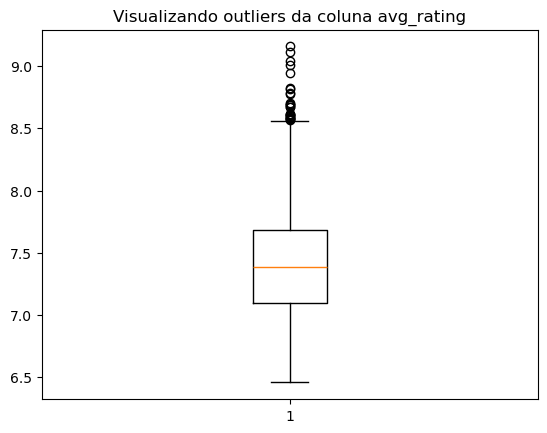

In [14]:

plt.boxplot(df['avg_rating'])
plt.title("Visualizando outliers da coluna avg_rating")
plt.show()

In [15]:
def calculate_iqr(df: pd.DataFrame, columns: list) -> dict:
    iqr_dict = {}
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        iqr_dict[col] = iqr
    return iqr_dict

iqr_values = calculate_iqr(df, cols_numeric)
print("IQR da coluna avg_rating")
print(iqr_values['avg_rating'])



IQR da coluna avg_rating
0.585


In [16]:
q1 = df['max_playtime'].quantile(0.25)
q3 = df['max_playtime'].quantile(0.75)
iqr = iqr_values['max_playtime']

limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

outliers_tempo_jogo = df[(df['max_playtime'] > limite_superior) | (df['max_playtime'] < limite_inferior)]
print(f"Quantidade de jogos considerados outliers de tempo de jogo: {outliers_tempo_jogo.shape[0]}")



Quantidade de jogos considerados outliers de tempo de jogo: 108


In [ ]:
def remove_outliers_iqr(df: pd.DataFrame, columns: list, iqr_dict: dict) -> pd.DataFrame:
    df_clean = df.copy()
    for col in columns:
        q1 = df_clean[col].quantile(0.25)
        q3 = df_clean[col].quantile(0.75)
        iqr = iqr_dict[col]
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df = remove_outliers_iqr(df,cols_numeric,iqr_values)



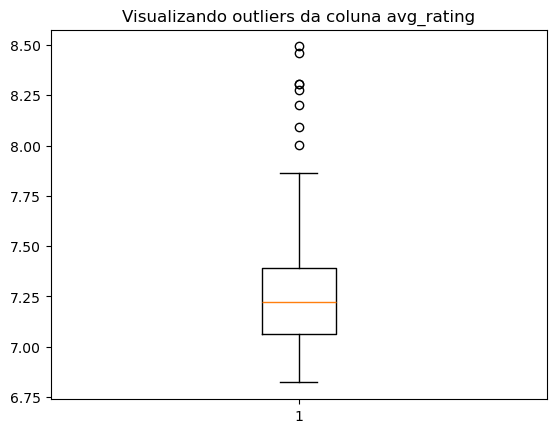

In [18]:
plt.boxplot(df['avg_rating'])
plt.title("Visualizando outliers da coluna avg_rating")
plt.show()

# Visualização e Transformação de Dados

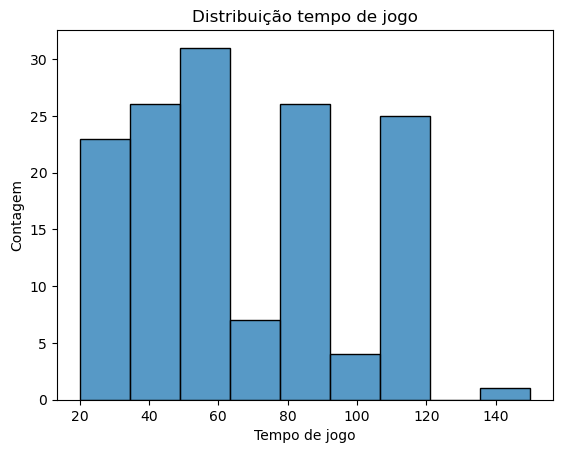

In [19]:

sns.histplot(df['max_playtime'])
plt.title("Distribuição tempo de jogo")
plt.xlabel("Tempo de jogo")
plt.ylabel("Contagem")
plt.show()

In [20]:

df['playing_time_log'] = np.log1p(df['max_playtime'])
df[['max_playtime', 'playing_time_log']].head()

,max_playtime,playing_time_log
742,60,4.110874
761,120,4.795791
777,45,3.828641
796,60,4.110874
808,120,4.795791


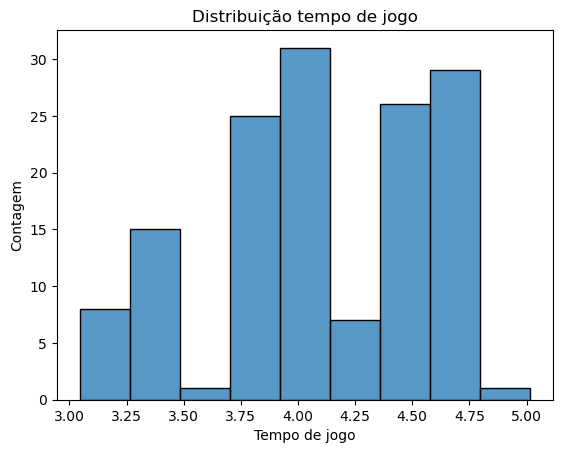

In [21]:
sns.histplot(df['playing_time_log'])
plt.title("Distribuição tempo de jogo")
plt.xlabel("Tempo de jogo")
plt.ylabel("Contagem")
plt.show()

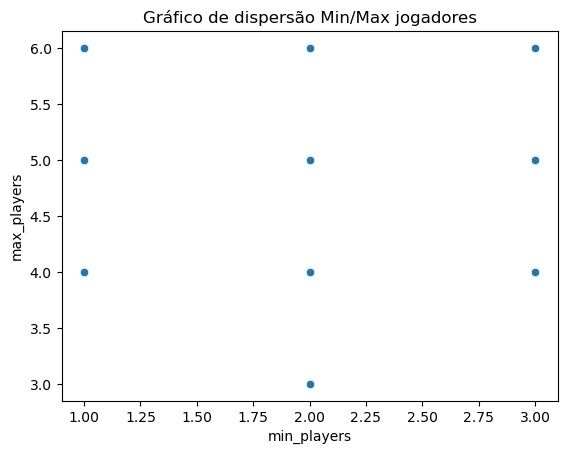

In [ ]:

sns.scatterplot(
    data=df ,
    x=df['min_players'] , 
    y=df['max_players']
)
plt.title("Gráfico de dispersão Min/Max jogadores")
plt.show()

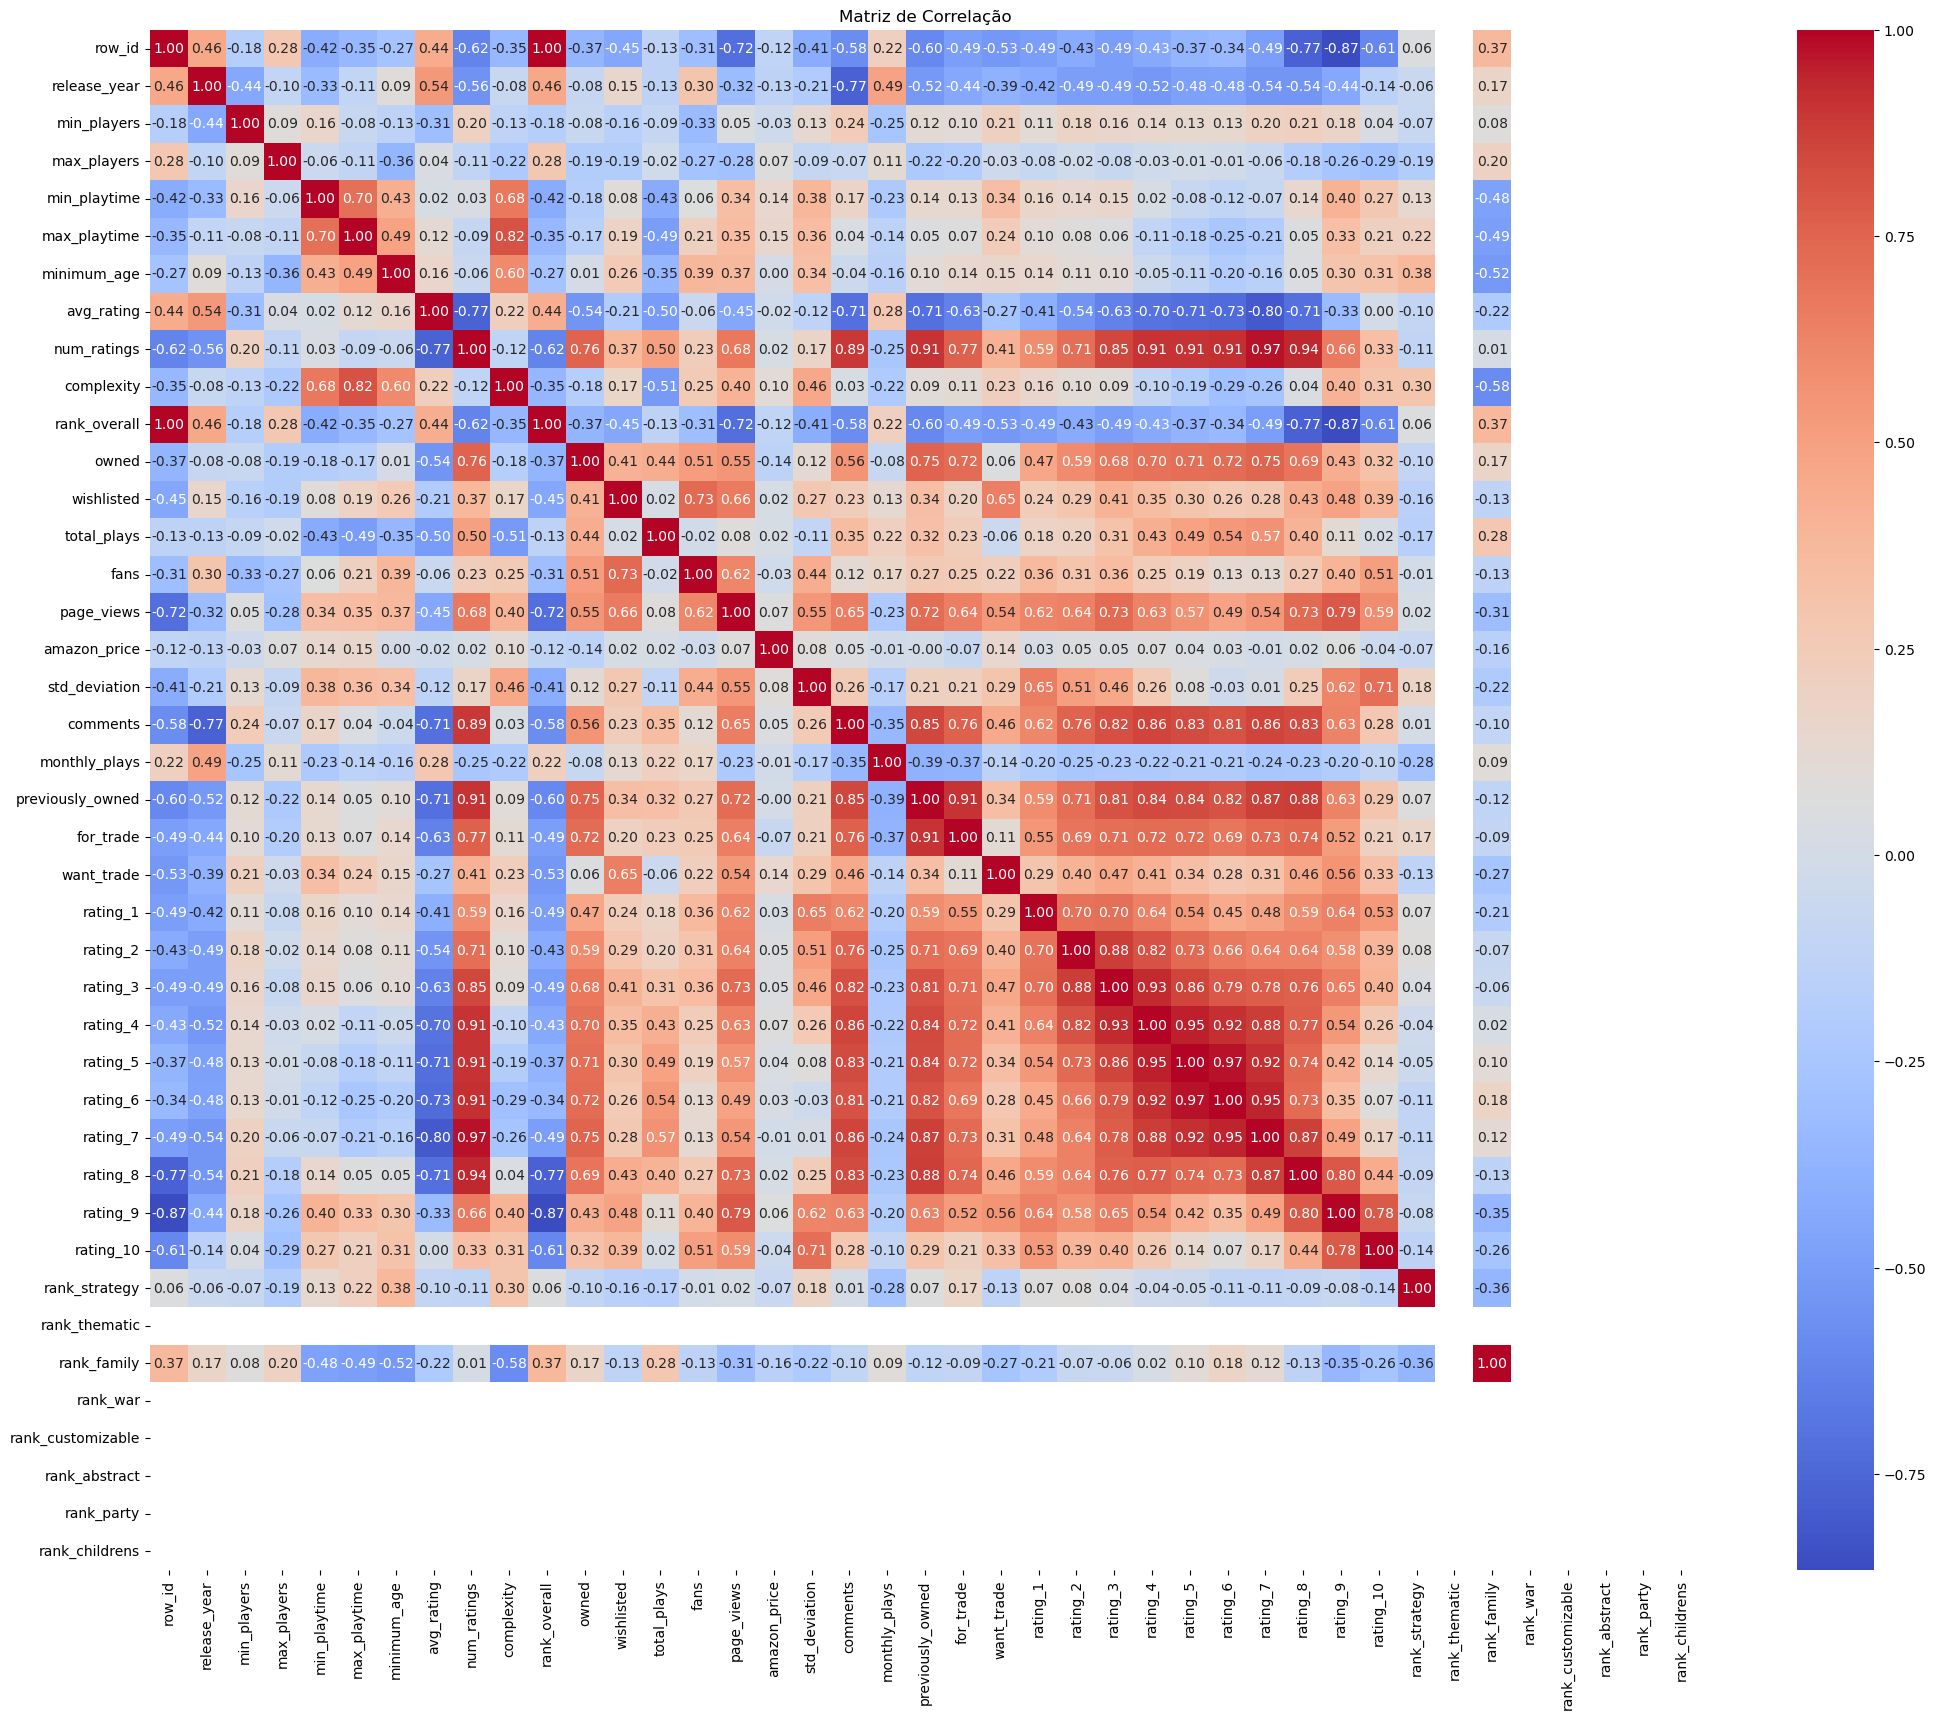

In [24]:

matriz_correlacao = df[cols_numeric].corr()
plt.figure(figsize=(25,20))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()



In [25]:
pares_corr = matriz_correlacao.unstack()
pares_corr = pares_corr[pares_corr < 1.0]
maior_corr_par = pares_corr.idxmax()
maior_corr_valor = pares_corr.loc[maior_corr_par]
print("Par com a maior correlação positiva:")
print(f"Colunas: {maior_corr_par}")
print(f"Valor: {maior_corr_valor:.4f}")

Par com a maior correlação positiva:
Colunas: ('row_id', 'rank_overall')
Valor: 0.9999


In [ ]:

menor_corr_abs = pares_corr.idxmin()
menor_corr = pares_corr.loc[menor_corr_abs]
print("Par com a maior correlação negativa:")
print(f"Colunas: {menor_corr_abs}")
print(f"Valor: {menor_corr:.4f}")



Par com a maior correlação negativa:
Colunas: ('rank_overall', 'rating_9')
Valor: -0.8664


In [27]:
df['Decada'] = (df['release_year'] // 10) * 10
contagem_decada = df.groupby('Decada').size().sort_index()
print(contagem_decada)

print(f"A década com o maior número de lançamentos foi a de \n: {contagem_decada.idxmax()} com {contagem_decada.max()} jogos lançados.")

Decada
1990     1
2000    22
2010    80
2020    40
dtype: int64
A década com o maior número de lançamentos foi a de 
: 2010 com 80 jogos lançados.
